<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.01-Two-Transient-Model-Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Under construction 🚧
#  Two transient model examples

In [10]:
from sympy import symbols, init_printing, Heaviside, laplace_transform, inverse_laplace_transform, plot, exp
from ipywidgets import interact
import matplotlib.pyplot as plt
import numpy
init_printing()
%matplotlib inline

## A transient-response example

In this example, we have a stirred-tank with a volume $V_1$ of 4 $m^3$ being operated with an inlet flow rate $Q$ of 0.02 $m^3 s^{-1}$ and that contains an inert species at a concentration $C_{in}$ of 1 $gmol$ $m^{-3}$.

The model equation is a continuous-flow stirred-tank without any chemical reaction:

$$ V_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = Q[C_{in}(t) - C_1(t)] $$

In terms of the time constant $\tau_1$, it is written as

$$ \tau_1\frac{\mathrm{d}C_1(t)}{\mathrm{d}t} = C_{in}(t) - C_1(t) $$

where $ \tau_1 = \frac{V_1}{Q} $. Considering the tank at steady state for $t\le0$, we have

$$ \tau_1\frac{\mathrm{d}C_1(0)}{\mathrm{d}t} = C_{in}(0) - C_1(0) $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau_1\frac{\mathrm{d}[C_1(t) - C_1(0)]}{\mathrm{d}t} = [C_{in}(t) - C_{in}(0)] - [C_1(t) - C_1(0)] $$

which can be rewritten to

$$ \tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t} = C_{in}'(t) - C_1'(t) $$

by considering the definition of the following *deviation variables*

$$ C_1'(t) = C_1(t) - C_1(0) $$
$$ C_{in}'(t) = C_{in}(t) - C_{in}(0) $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau_1\frac{\mathrm{d}C_1'(t)}{\mathrm{d}t}\right\} &= \mathcal{L}\{C_{in}'(t) - C_1'(t)\} \\
\tau_1sC_1'(s) &= C_{in}'(s) - C_1'(s) \\
\frac{C_1'(s)}{C_{in}'(s)} &= \frac{1}{\tau_1s + 1} \\
\end{align}

The RHS expression is the ratio of the output *deviation variable* Laplace transform $C_1'(s)$ to the input *deviation variable* Laplace transform $C_{in}'(s)$ and is called *transfer function* because it transfers the dynamic variation of the input *deviation variable* to the output *deviation variable*.

> N.B.: Part of the following material was taken from this [Carl Sandrock's notebook](https://colab.research.google.com/github.com/alchemyst/Dynamics-and-Control/blob/master/1_Dynamics/4_First_and_second_order_system_dynamics/First%20order%20systems.ipynb).

In [5]:
t, K, tau1 = symbols('t, K, tau1',real=True, positive=True)
s = symbols('s')
V1 = 4
Q = 0.02

In [14]:
def L(f):
    return laplace_transform(f, t, s, noconds=True)
def invL(F):
    return inverse_laplace_transform(F, s, t)

In [14]:
u = Heaviside(t)

In [15]:
U = L(u)
U

Now let us define the obtained *transfer function*:

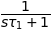

In [16]:
G = 1/(tau1*s + 1)
G

The inverse Laplace transform of a *transfer function* is its *impulse response*

In [17]:
impulseresponse = invL(G)
impulseresponse

We can also plot it.

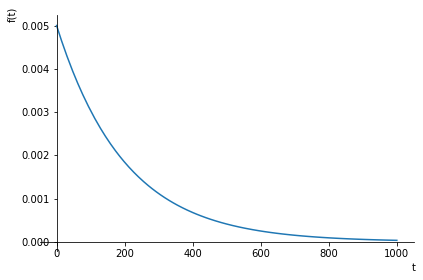

In [20]:
plot(impulseresponse.subs(tau1, V1/Q), (t, 0 ,1000))

If $C_{in}'(t)$ is the unit step function, $C_{in}'(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [22]:
u = 1/s
stepresponse = invL(G*u)
stepresponse

And the plot is:

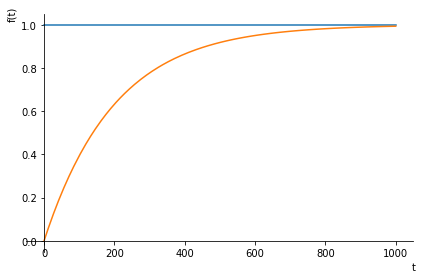

In [28]:
plot(1, stepresponse.subs(tau1, V1/Q), (t, 0 ,1000))

Similarly, the ramp response can be obtained as follows:

In [25]:
u = 1/s**2
rampresponse = invL(G*u)
rampresponse

And the plot is:

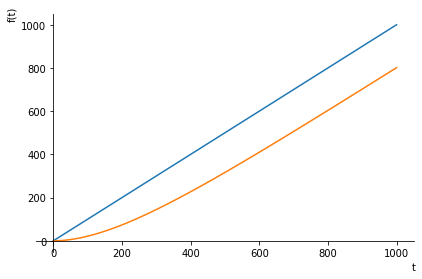

In [27]:
plot(t, rampresponse.subs(tau1, V1/Q), (t, 0 ,1000))

Let's see what happens when the flowrate $Q$ is varied between 10% and 90% of its nominal value. 

In [34]:
def stirtank(dQ):
  plot(1, 
       stepresponse.subs(tau1, V1/(dQ*Q/100)), 
       stepresponse.subs(tau1, V1/Q),  
       (t, 0 ,1000),
       legend=True)
  
interact(stirtank, dQ=(10.0, 190.0))

interactive(children=(FloatSlider(value=100.0, description='dQ1', max=190.0, min=10.0), Output()), _dom_classe…

<function __main__.stirtank>

## A stirred-tank heater

In this example, we have a stirred-tank heater. The heat balance, in standard heat transfer notation, is:

$$ \rho C_p V\frac{\mathrm{d}T(t)}{\mathrm{d}t} = \rho C_p Q[T_{i}(t) - T(t)] + UA[T_H(t) - T(t)] $$

where $U$ is the overall heat transfer coefficient, $A$ is the heat transfer area, $\rho$ is the fluid density, $C_p$ is the heat capacity, and $V$ is the volume of the vessel. The inlet temperature $T_i(t)$ and steam-coil temperature $T_H(t)$ are functions of time and are presumably given. The initial condition is $T(0) = T^s$ , the steady-state temperature.

Before we go on, it should be emphasized that what we subsequently find are nothing but different algebraic manipulations of the same heat balance. First, we rearrange it to give

$$ \frac{V}{Q} \frac{\mathrm{d}T(t)}{\mathrm{d}t} = [T_{i}(t) - T(t)] + \frac{UA}{\rho C_p Q}[T_H(t) - T(t)] $$

The second step is to define $ \tau = \frac{V}{Q} $ and $ \kappa =  \frac{UA}{\rho C_p Q}$ which leads to

$$ \tau \frac{\mathrm{d}T(t)}{\mathrm{d}t} + (1 + \kappa)T(t)= T_{i}(t) + \kappa T_H(t) $$

Which is also valid at steady-state

$$ \tau \frac{\mathrm{d}T^s}{\mathrm{d}t} + (1 + \kappa)T^s = T^{s}_{i} + \kappa T^{s}_H $$

Subtracting the steady state equation from the dynamic one, we end up with

$$ \tau \frac{\mathrm{d}[T(t) - T^s]}{\mathrm{d}t} + (1 + \kappa)[T(t) - T^s] = [T_{i}(t) - T^{s}_{i}] + \kappa [T_H(t) + \kappa T^{s}_{H}] $$

which can be rewritten to

$$ \tau\frac{\mathrm{d}T'(t)}{\mathrm{d}t} + (1 + \kappa)T'(t) = T_{i}'(t) + \kappa T_H'(t) $$

by considering the definition of the following *deviation variables*

$$ T'(t) = T(t) - T^s $$
$$ T_i'(t) = T_i(t) - T^s_i $$
$$ T_H'(t) = T_H(t) - T^s_H $$

These *deviation variables* are simply the difference between the values of each *original variable* from their respective initial steady state value. Applying the Laplace transform in the ordinary differential equation rewritten in *deviation variables*, we have

\begin{align}
\mathcal{L}\left\{\tau\frac{\mathrm{d}T'(t)}{\mathrm{d}t}\right\} + \mathcal{L}\{(1 + \kappa)T'(t)\} &= \mathcal{L}\{T_{i}'(t)\} + \mathcal{L}\{\kappa T_{H}'(t)\} \\
\tau sT'(s) + (1 + \kappa)T'(s) &= T_{i}'(s) + \kappa T_{H}'(s) \\
T'(s) &= \frac{1}{\tau s + 1 + \kappa}T_{i}'(s) + \frac{\kappa}{\tau s + 1 + \kappa}T_{H}'(s) \\
T'(s) &= \frac{1/(1 + \kappa)}{\tau/(1 + \kappa) s + 1}T_{i}'(s) + \frac{\kappa/(1 + \kappa)}{\tau/(1 + \kappa) s + 1 }T_{H}'(s) \\
T'(s) &= \frac{K_i}{\tau_p s + 1}T_{i}'(s) + \frac{K_H}{\tau_p s + 1 }T_{H}'(s) \\
\end{align}

where $ \tau_p = \tau/(1 + \kappa) $, $ K_i = 1/(1 + \kappa) $ and $ K_H = \kappa/(1 + \kappa) $.

At the RHS expression we can see the ratios of the output *deviation variable* Laplace transform $T'(s)$ to each of the input *deviation variables* Laplace transforms $T_{i}'(s)$ and $T_{H}'(s)$. These ratios are called *transfer functions* because they transfer the dynamic variation of the respective input *deviation variable* to the output *deviation variable*.

Now let us define the first *transfer function*:

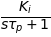

In [16]:
taup = symbols('tau_p',real=True, positive=True)
Ki = symbols('K_i')
G = Ki/(taup*s + 1)
G

If $T_{i}'(t)$ is the unit step function, $T_{i}'(s)=\frac{1}{s}$ and we can obtain the step response as follows:

In [20]:
u = 1/s
stepresponse = invL(G*u)
stepresponse


Let's see what happens when the parameters are varied between 10% and 90% of their nominal values. 

In [31]:
UA = 0.005
rhoCp = 1
kappa = UA/(rhoCp*Q)

def heattank(dQ, dUA, drhoCp):
  dkappa = (dUA*UA/100)/(drhoCp*rhoCp*dQ*Q/10000)
  plot(1, 
       stepresponse.subs({taup: V1/(dQ*Q/100)/(1+dkappa), Ki: 1/(1+dkappa)}), 
       stepresponse.subs({taup: V1/Q/(1+kappa), Ki: 1/(1+kappa)}),  
       (t, 0 ,1000),
       legend=True)
  
interact(heattank, dQ=(10.0, 190.0), dUA=(10.0, 190.0), drhoCp=(10.0, 190.0))

interactive(children=(FloatSlider(value=100.0, description='dQ', max=190.0, min=10.0), FloatSlider(value=100.0…

<function __main__.heattank>